Name of the Intern : Tejas Vidyadhar Kudalkar

Internship Project Name - Credit Card Fraud Detection Using Machine Learning

Company Name - CodSoft

In [17]:
import pandas as pd
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Load the data
train_data_path = 'C:\\Users\\Dell\\Downloads\\fraudTrain.csv'
test_data_path = 'C:\\Users\\Dell\\Downloads\\fraudTest.csv'
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [20]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [21]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [22]:
print(train_df['is_fraud'].value_counts())

0    1289169
1       7506
Name: is_fraud, dtype: int64


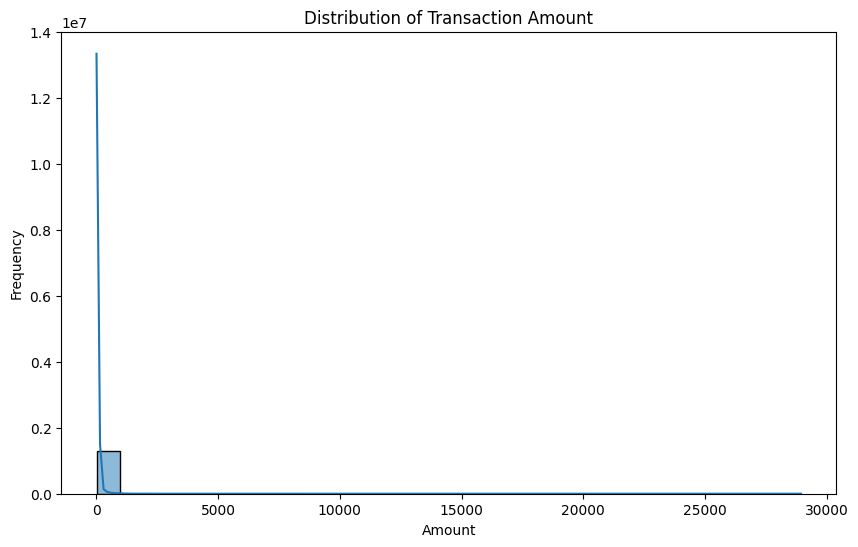

In [23]:
# Histogram of 'amt'
plt.figure(figsize=(10, 6))
sns.histplot(train_df['amt'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

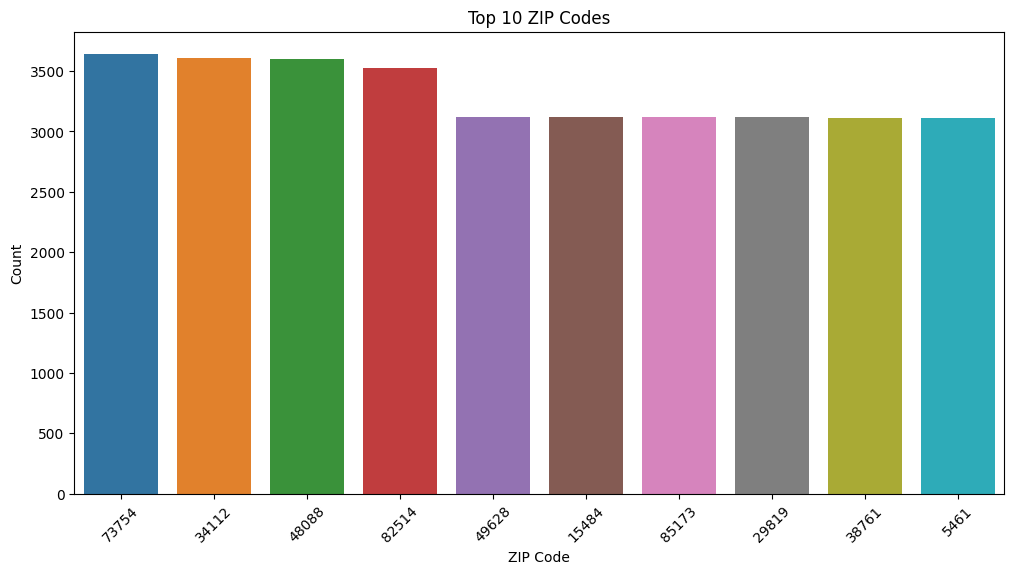

In [24]:
# Count plot of 'zip' with the top 10 ZIP codes
top_zip_codes = train_df['zip'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x='zip', data=train_df[train_df['zip'].isin(top_zip_codes)], order=top_zip_codes)
plt.title('Top 10 ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


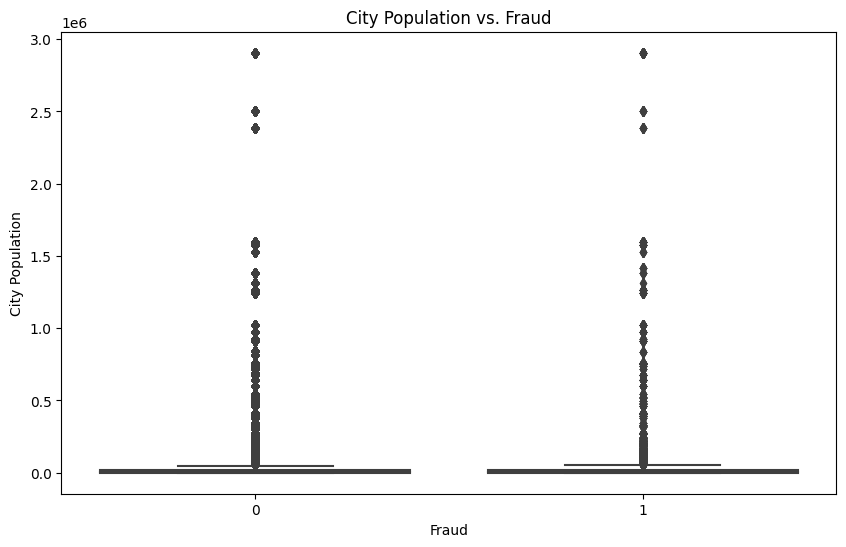

In [25]:
# Box plot of 'city_pop' with 'is_fraud' as hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='city_pop', data=train_df)
plt.title('City Population vs. Fraud')
plt.xlabel('Fraud')
plt.ylabel('City Population')
plt.show()


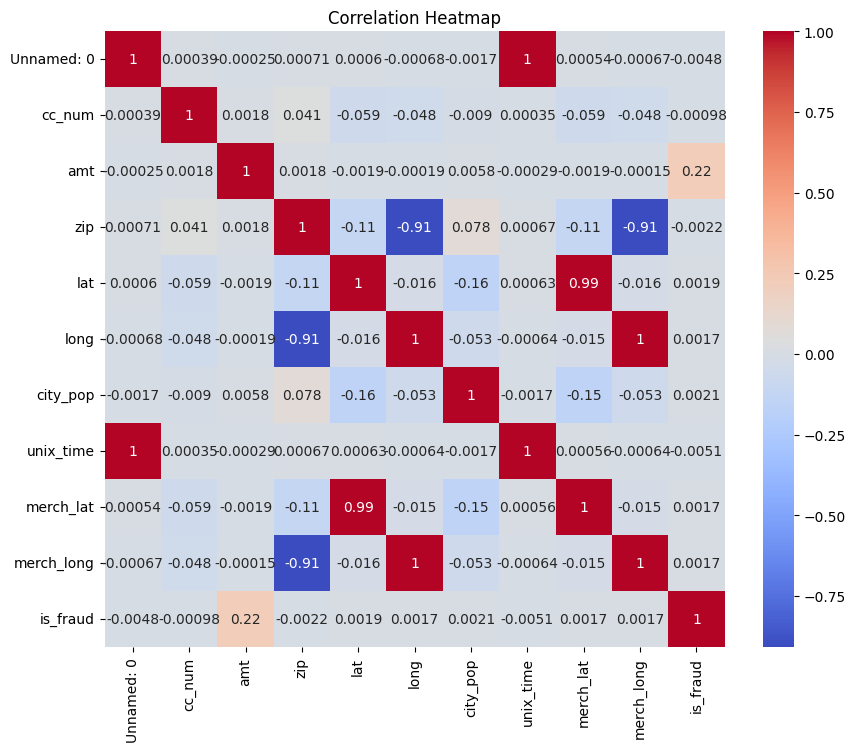

In [26]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [3]:

# Preprocess text data
train_df['merchant_processed'] = train_df['merchant'].apply(lambda x: ' '.join(x.lower().split()))


In [4]:
# Create TF-IDF vectorizer with reduced max_features
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Reduced max_features
tfidf_features = tfidf_vectorizer.fit_transform(train_df['merchant_processed'])


In [5]:
# Combine numerical and TF-IDF features
numerical_features = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X_numerical = train_df[numerical_features]


In [6]:

# Create Min-Max scaler
scaler = MinMaxScaler()


In [7]:

# Scale numerical features
X_numerical_scaled = scaler.fit_transform(X_numerical)

In [8]:

# Combine scaled numerical and TF-IDF features using sparse matrix hstack
X_combined = hstack((X_numerical_scaled, tfidf_features))


In [9]:

y_combined = train_df['is_fraud']

In [10]:
# Split the combined data into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42
)

In [11]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_combined, y_train_combined)
y_pred_rf = rf_model.predict(X_test_combined)
print("Random Forest:")
print(classification_report(y_test_combined, y_pred_rf))
accuracy_rf = accuracy_score(y_test_combined, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")


Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.86      0.45      0.59      1520

    accuracy                           1.00    259335
   macro avg       0.93      0.72      0.79    259335
weighted avg       1.00      1.00      1.00    259335

Accuracy: 1.00


In [14]:

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_combined, y_train_combined)
y_pred_gb = gb_model.predict(X_test_combined)
print("Gradient Boosting:")
print(classification_report(y_test_combined, y_pred_gb))
accuracy_gb = accuracy_score(y_test_combined, y_pred_gb)
print(f"Accuracy: {accuracy_gb:.2f}")


Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.64      0.33      0.43      1520

    accuracy                           0.99    259335
   macro avg       0.82      0.66      0.72    259335
weighted avg       0.99      0.99      0.99    259335

Accuracy: 0.99


In [15]:
# Neural Network (MLP)
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train_combined, y_train_combined)
y_pred_nn = nn_model.predict(X_test_combined)
print("Neural Network (MLP):")
print(classification_report(y_test_combined, y_pred_nn))
accuracy_nn = accuracy_score(y_test_combined, y_pred_nn)
print(f"Accuracy: {accuracy_nn:.2f}")


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Neural Network (MLP):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.74      0.35      0.48      1520

    accuracy                           1.00    259335
   macro avg       0.87      0.68      0.74    259335
weighted avg       0.99      1.00      0.99    259335

Accuracy: 1.00
